## Importing packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## Loading and viewing data

In [2]:
df = pd.read_csv('churn_prediction.csv')

In [3]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [4]:
df.shape

(28382, 21)

## Exploratory Data Analysis

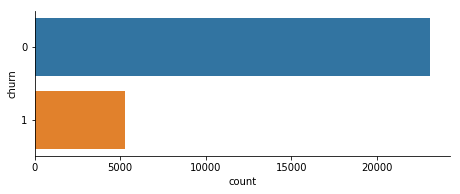

In [5]:
ax = sns.catplot(y="churn", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

In [6]:
df['churn'].value_counts(normalize = True)

0    0.814671
1    0.185329
Name: churn, dtype: float64

The above values represent the distribution of target values.

Let us now look at the data types of individual entries

In [8]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

## Univariate Analysis on Current month balance and Previous month balance

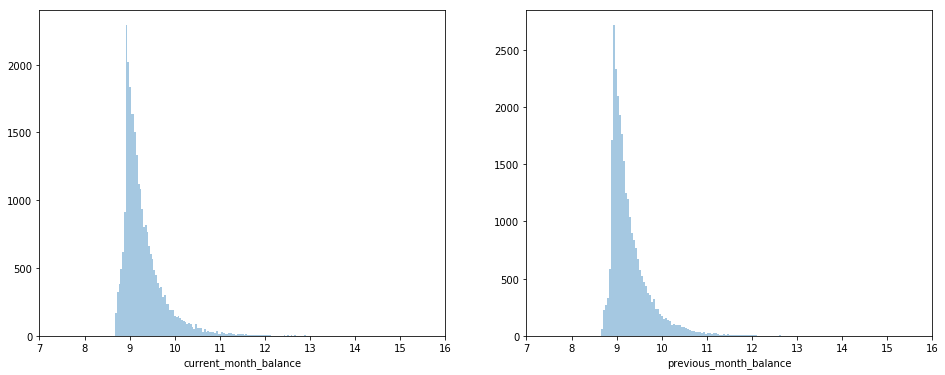

In [9]:
# Numerical Features
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
xmin = 7
xmax = 16
# Current Month Average Balance
temp = np.log(df['current_month_balance'] + 6000) # To account for negative values we add a constant value within log
ax1.set_xlim([xmin,xmax])
ax1.set(xlabel='log of average balance of current month')
sns.distplot(temp, kde = False, bins = 200, ax = ax1)


# Previous month average balance
temp = np.log(df['previous_month_balance'] + 6000) # To account for negative values we add a constant value within log
ax2.set_xlim([xmin,xmax])
ax2.set(xlabel='log of average balance of previous month')
sns.distplot(temp, kde = False, bins = 200, ax = ax2)


plt.show()

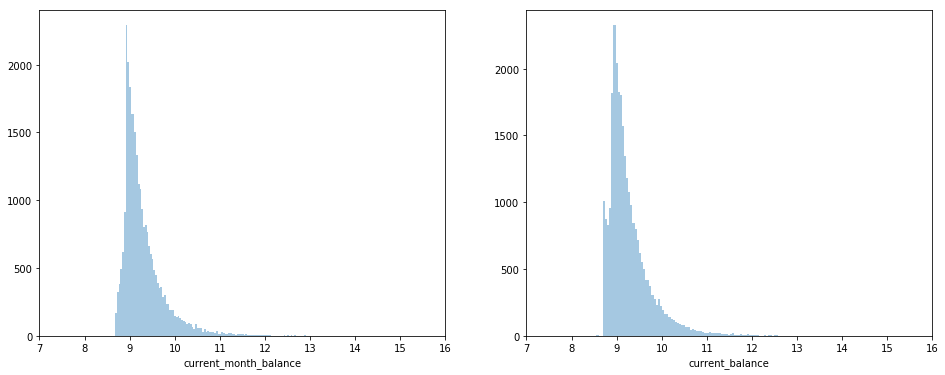

In [10]:
# Numerical Features
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
xmin = 7
xmax = 16
# Current Month Average Balance
temp = np.log(df['current_month_balance'] + 6000) # To account for negative values we add a constant value within log
ax1.set_xlim([xmin,xmax])
#ax1.set(xlabel='log of average balance of current month')
sns.distplot(temp, kde = False, bins = 200, ax = ax1)


# Current End of month average balance
temp = np.log(df['current_balance'] + 6000) # To account for negative values we add a constant value within log
ax2.set_xlim([xmin,xmax])
#ax2.set(xlabel='log of month end balance of current  month')
sns.distplot(temp, kde = False, bins = 200, ax = ax2)


plt.show()

## Bivariate analysis on current month and previous month balances

In [11]:
balance_cols = ['current_balance','previous_month_end_balance',
                'current_month_balance', 'previous_month_balance']
df1 = pd.DataFrame()

for i in balance_cols:
    df1[str('log_')+ i] = np.log(df[i] + 6000)

log_balance_cols = df1.columns

In [12]:
df1['churn'] = df['churn']

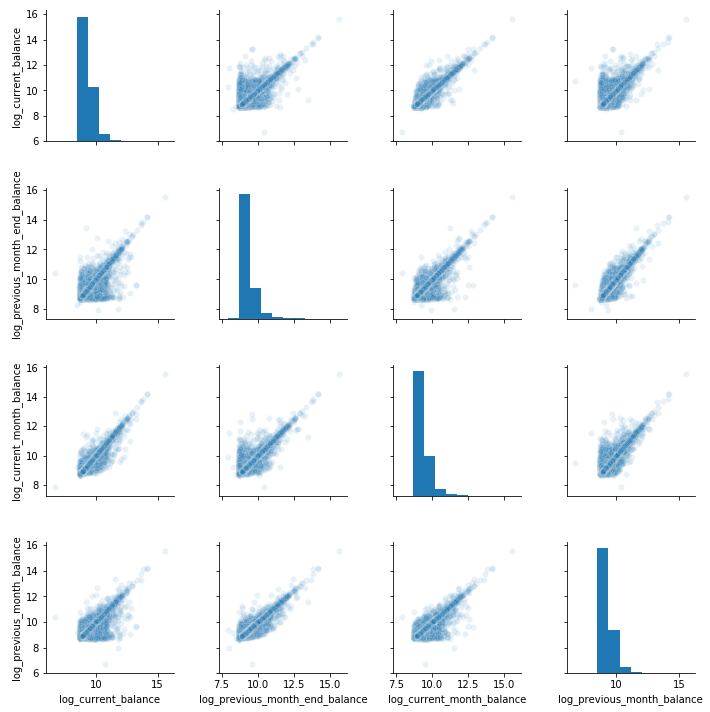

In [13]:
#sns.pairplot(df1,vars=log_balance_cols, hue = 'churn',plot_kws={'alpha':0.1})
df1_no_churn = df1[df1['churn'] == 0]
sns.pairplot(df1_no_churn,vars=log_balance_cols,plot_kws={'alpha':0.1})
plt.show()

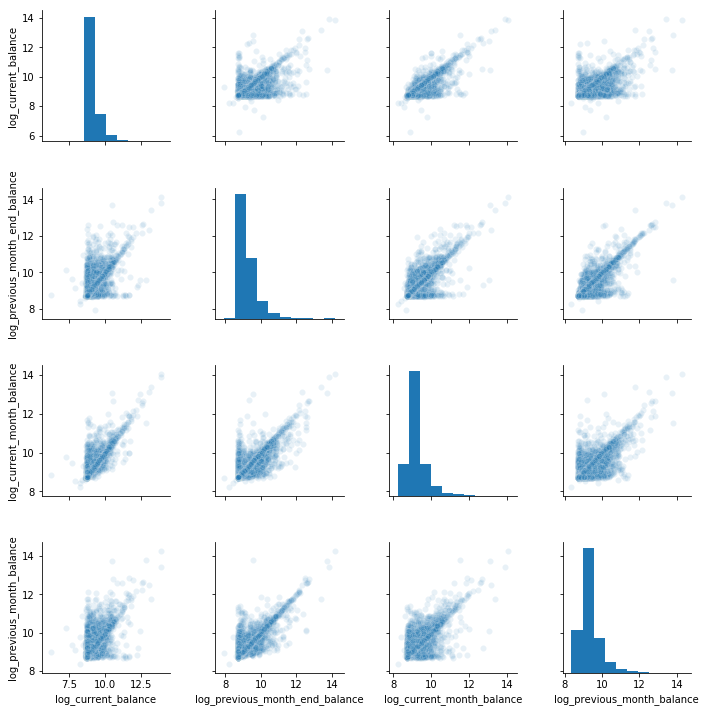

In [14]:
#sns.pairplot(df1,vars=log_balance_cols, hue = 'churn',plot_kws={'alpha':0.1})
df1_churn = df1[df1['churn'] == 1]
sns.pairplot(df1_churn,vars=log_balance_cols,plot_kws={'alpha':0.1})
plt.show()

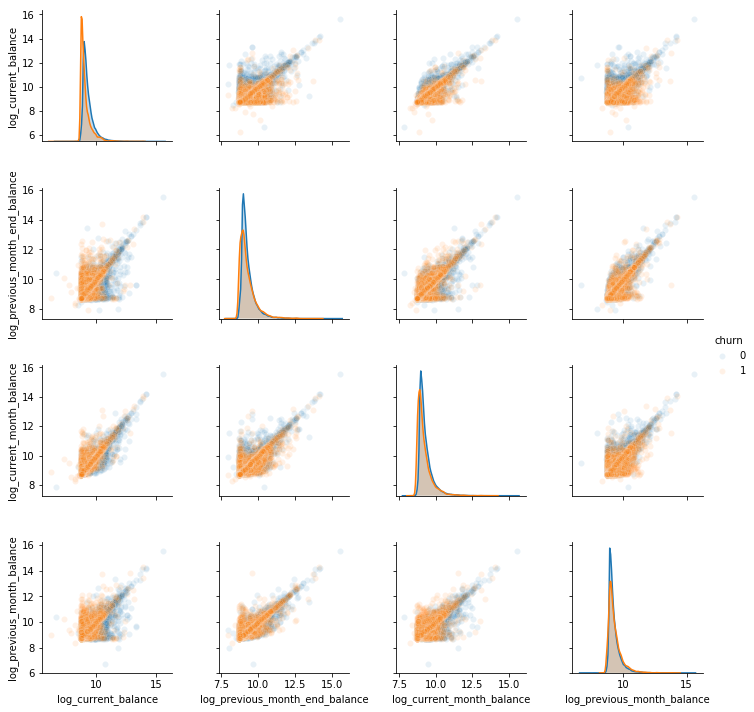

In [15]:
sns.pairplot(df1,vars=log_balance_cols,hue ='churn',plot_kws={'alpha':0.1})
plt.show()

## Perentage change in credits

In [17]:
cr_dr_cols = ['current_month_credit','previous_month_credit', 
              'current_month_debit', 'previous_month_debit']
df1 = pd.DataFrame()

for i in cr_dr_cols:
    df1[str('log_')+ i] = np.log(df[i])

log_dr_cr_cols = df1.columns
df1['churn'] = df['churn']

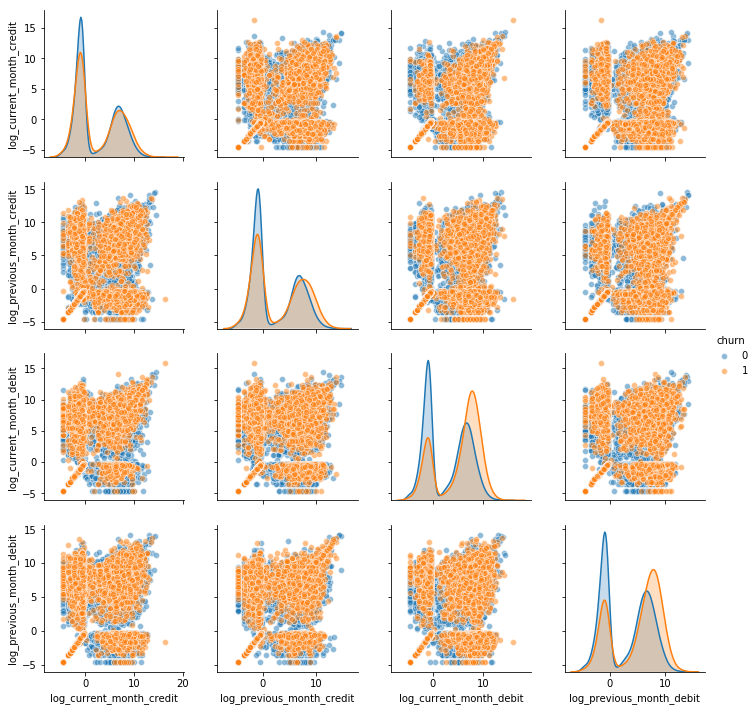

In [18]:
sns.pairplot(df1,vars=log_dr_cr_cols, hue = 'churn',plot_kws={'alpha':0.5})
plt.show()

In [19]:
q_cols = ['average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2']
df1 = pd.DataFrame()

for i in q_cols:
    df1[str('log_')+ i] = np.log(df[i] + 17000)

log_q_cols = df1.columns
df1['churn'] = df['churn']

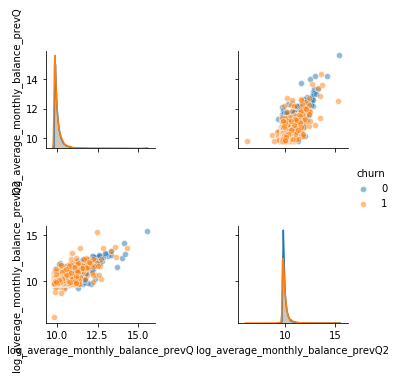

In [20]:
sns.pairplot(df1,vars=log_q_cols, hue = 'churn',plot_kws={'alpha':0.5})
plt.show()

In [21]:
# Remove 1st and 99th percentile and plot

df2 = df[['average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2']]

low = .01
high = .99
quant_df = df2.quantile([low, high])
print(quant_df)

      average_monthly_balance_prevQ  average_monthly_balance_prevQ2
0.01                      1449.0377                        121.6485
0.99                     60118.2288                      59357.8810


In [22]:
df3 = df2.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & (x < quant_df.loc[high,x.name])], axis=0)

In [23]:
q_cols = ['average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2']
df1 = pd.DataFrame()

for i in q_cols:
    df1[str('log_')+ i] = np.log(df3[i] + 17000)

log_q_cols = df1.columns
df1['churn'] = df['churn']

D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


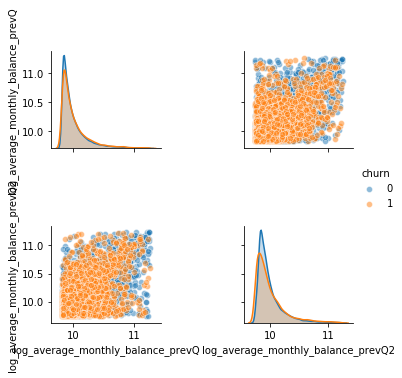

In [24]:
sns.pairplot(df1,vars=log_q_cols, hue = 'churn',plot_kws={'alpha':0.5})
plt.show()

## KDE plots for Days since last transaction, age, vintage

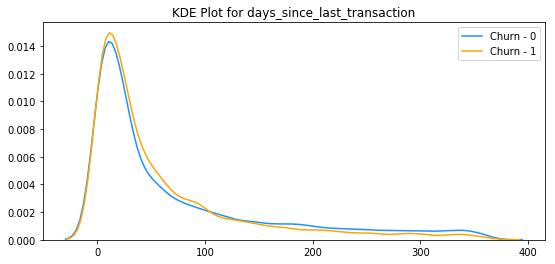

In [26]:
# KDE Plot Smoothens out even if there are no values for a value
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE Plot for {}".format(feature))
    ax0 = sns.kdeplot(df[df['churn'] == 0][feature].dropna(), color= 'dodgerblue', label= 'Churn - 0')
    ax1 = sns.kdeplot(df[df['churn'] == 1][feature].dropna(), color= 'orange', label= 'Churn - 1')

kdeplot('days_since_last_transaction')

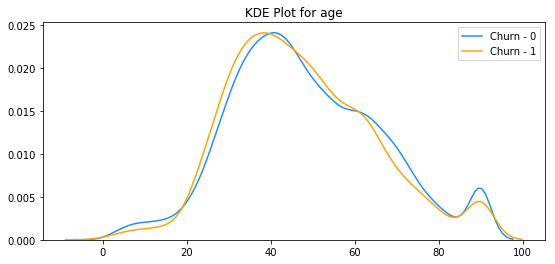

In [27]:
kdeplot('age')

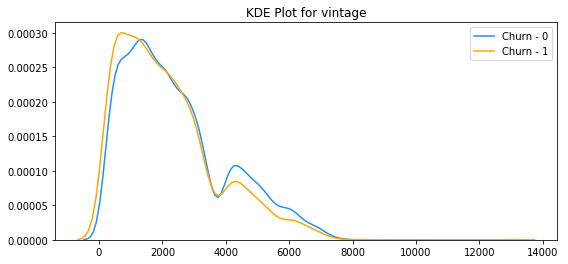

In [28]:
kdeplot('vintage')

## Correlation and Heatmap

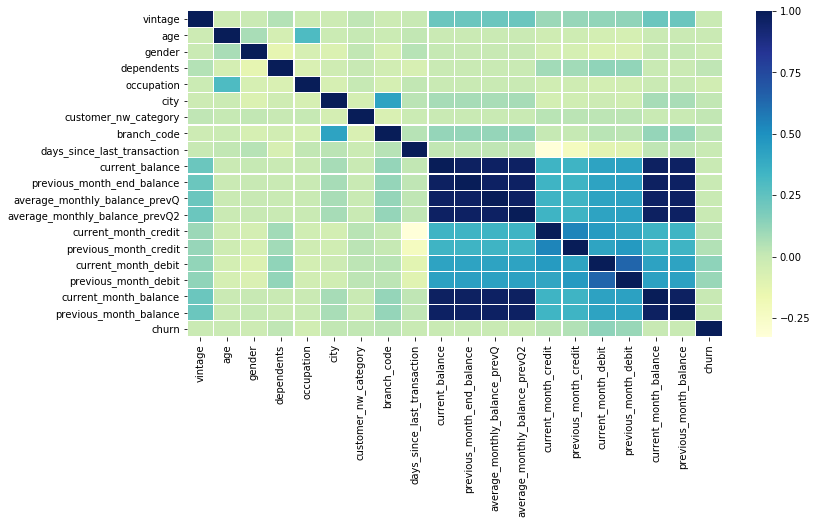

In [29]:
plt.figure(figsize=(12, 6))
df.drop(['customer_id'],
        axis=1, inplace=True)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

### Conclusion for Churn
* From the sample, around 17% customers are churning
* Current balance and average monthly balance values have a left skewed distribution as observed from the histogram
* No significant difference in distributions for average monthly balance and month end balances
* Bimodal distribution/Double Bell Curve shows that there are 2 different types of customers with 2 brackets of credit and debit. Now, during the modeling phase, these could be considered as a seperate set of customers
* For debit values, we see that there is a significant difference in the distribution for churn and non churn and it might be turn out to be an important feature
* For most frequent vintage values, the churning customers are slightly higher, while for higher values of vintage, we have mostly non churning customers which is in sync with the age variable 
* Gender does not look like a very significant variable as the ratio of churned customers and others is very similar
* Self Employed and salaried have higher churn rate and are the most frequently occuring categories.
* Not much difference in customer net worth category when it comes to churn

Now, let us build logic regression models to predict the churn of bank customers

In [30]:
df.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,2356,31,Male,0.0,salaried,146.0,2,41,NaN,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


Let us first check for any missing values. 

In [33]:
pd.isnull(df).sum()

vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

## Managing missing values

### Gender

In [34]:
df['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

SInce they are almost equally distributed, we will replace the missing values with a new value.

In [35]:
dict_gender = {'Male': 1, 'Female':0}
df.replace({'gender': dict_gender}, inplace = True)

df['gender'] = df['gender'].fillna(-1)

### Dependants

In [36]:
df['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [37]:
# Filling with mode
df['dependents'] = df['dependents'].fillna(0)

### Occupation

In [38]:
df['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [39]:
# Filling with mode
df['occupation'] = df['occupation'].fillna('self_employed')

### City

In [42]:
df["city"].value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
334.0      930
1232.0     840
623.0      778
15.0       669
575.0      631
1525.0     375
905.0      345
491.0      312
1111.0     312
1494.0     289
649.0      281
1589.0     251
318.0      245
1084.0     240
61.0       237
531.0      227
656.0      197
904.0      187
630.0      166
1181.0     150
1271.0     150
1076.0     133
745.0      130
996.0      119
621.0      114
          ... 
1179.0       1
1421.0       1
973.0        1
847.0        1
1001.0       1
1279.0       1
1137.0       1
1245.0       1
1594.0       1
948.0        1
1026.0       1
1166.0       1
1545.0       1
808.0        1
503.0        1
1300.0       1
1605.0       1
824.0        1
607.0        1
1011.0       1
728.0        1
1207.0       1
566.0        1
972.0        1
1448.0       1
629.0        1
527.0        1
1212.0       1
530.0        1
70.0         1
Name: city, Length: 1604, dtype: int64

In [43]:
df['city'] = df['city'].fillna(1020)

In [44]:
df['days_since_last_transaction'] = df['days_since_last_transaction'].fillna(999)

## Preprocessing

### Creating Dummies for categorical variables

In [45]:
# Convert occupation to one hot encoded features
df = pd.concat([df,pd.get_dummies(df['occupation'],prefix = str('occupation'),prefix_sep='_')],axis = 1)

In [46]:
num_cols = ['customer_nw_category', 'current_balance',
            'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit', 
            'previous_month_debit','current_month_balance', 'previous_month_balance']
for i in num_cols:
    df[i] = np.log(df[i] + 17000)

std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [47]:
df_df_og = df.copy()
df = df.drop(columns = num_cols,axis = 1)
df = df.merge(scaled,left_index=True,right_index=True,how = "left")

In [49]:
y_all = df.churn
df = df.drop(['churn','occupation'],axis = 1)

## Model Building

Creating a function to perform the regression and return the evaluation metrics such as recall, precision, AUC

In [50]:
def cv_score(ml_model, rstate = 12, thres = 0.5, cols = df.columns):
    i = 1
    cv_scores = []
    df1 = df.copy()
    df1 = df[cols]
    
    # 5 Fold cross validation stratified on the basis of target
    kf = StratifiedKFold(n_splits=5,random_state=rstate,shuffle=True)
    for df_index,test_index in kf.split(df1,y_all):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = df1.loc[df_index],df1.loc[test_index]
        ytr,yvl = y_all.loc[df_index],y_all.loc[test_index]
            
        # Define model for fitting on the training set for each fold
        model = ml_model
        model.fit(xtr, ytr)
        pred_probs = model.predict_proba(xvl)
        pp = []
         
        # Use threshold to define the classes based on probability values
        for j in pred_probs[:,1]:
            if j>thres:
                pp.append(1)
            else:
                pp.append(0)
         
        # Calculate scores for each fold and print
        pred_val = pp
        roc_score = roc_auc_score(yvl,pred_probs[:,1])
        recall = recall_score(yvl,pred_val)
        precision = precision_score(yvl,pred_val)
        sufix = ""
        msg = ""
        msg += "ROC AUC Score: {}, Recall Score: {:.4f}, Precision Score: {:.4f} ".format(roc_score, recall,precision)
        print("{}".format(msg))
         
         # Save scores
        cv_scores.append(roc_score)
        i+=1
    return cv_scores

## Baseline Model
Let us now build a baseline model to compare against

In [51]:
baseline_cols = ['current_month_debit', 'previous_month_debit','current_balance','previous_month_end_balance','vintage'
                 ,'occupation_retired', 'occupation_salaried','occupation_self_employed', 'occupation_student']

In [52]:
df_baseline = df[baseline_cols]

In [53]:
baseline_scores = cv_score(LogisticRegression(), cols = baseline_cols)


1 of kfold 5
ROC AUC Score: 0.7625719864351043, Recall Score: 0.1359, Precision Score: 0.6560 

2 of kfold 5
ROC AUC Score: 0.782252800328846, Recall Score: 0.1236, Precision Score: 0.6533 

3 of kfold 5
ROC AUC Score: 0.7558384836265081, Recall Score: 0.1283, Precision Score: 0.6081 

4 of kfold 5
ROC AUC Score: 0.7688290634415251, Recall Score: 0.1217, Precision Score: 0.6632 

5 of kfold 5
ROC AUC Score: 0.7628738142539503, Recall Score: 0.1331, Precision Score: 0.6422 


Let us now consider all the features of the dataset and predict the outcomes

In [54]:
all_feat_scores = cv_score(LogisticRegression())


1 of kfold 5
ROC AUC Score: 0.793146644743603, Recall Score: 0.2082, Precision Score: 0.7604 

2 of kfold 5
ROC AUC Score: 0.8069059706093927, Recall Score: 0.2348, Precision Score: 0.7077 

3 of kfold 5
ROC AUC Score: 0.776886709447814, Recall Score: 0.1911, Precision Score: 0.7128 

4 of kfold 5
ROC AUC Score: 0.80302040437065, Recall Score: 0.2110, Precision Score: 0.7327 

5 of kfold 5
ROC AUC Score: 0.790556091873117, Recall Score: 0.2120, Precision Score: 0.7384 


## Reverse Feature Estimation
Now,we will use reverse feature estimation to determine the ranking of importance of each features

In [55]:
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Create the RFE object and rank each feature
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(df, y_all)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=1, step=1, verbose=0)

In [56]:
ranking_df = pd.DataFrame()
ranking_df['Feature_name'] = df.columns
ranking_df['Rank'] = rfe.ranking_

In [57]:
ranked = ranking_df.sort_values(by=['Rank'])

In [59]:
ranked

,Feature_name,Rank
13,current_balance,1
16,average_monthly_balance_prevQ,2
7,occupation_company,3
15,average_monthly_balance_prevQ2,4
21,current_month_balance,5
22,previous_month_balance,6
19,current_month_debit,7
8,occupation_retired,8
20,previous_month_debit,9
11,occupation_student,10


## Model with top 10 features

In [60]:
rfe_top_10_scores = cv_score(LogisticRegression(), cols = ranked['Feature_name'][:10].values)


1 of kfold 5
ROC AUC Score: 0.7923771452060426, Recall Score: 0.2272, Precision Score: 0.7469 

2 of kfold 5
ROC AUC Score: 0.8118160517932381, Recall Score: 0.2253, Precision Score: 0.7248 

3 of kfold 5
ROC AUC Score: 0.7891713509939874, Recall Score: 0.2091, Precision Score: 0.7120 

4 of kfold 5
ROC AUC Score: 0.80343977363927, Recall Score: 0.2129, Precision Score: 0.7226 

5 of kfold 5
ROC AUC Score: 0.7963736070361941, Recall Score: 0.2063, Precision Score: 0.7138 


## Comparing these models
Now, let us compare all the models

In [61]:
results_df = pd.DataFrame({'baseline':baseline_scores, 'all_feats': all_feat_scores, 'rfe_top_10': rfe_top_10_scores})

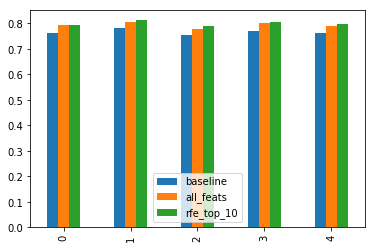

In [62]:
results_df.plot(y=["baseline", "all_feats", "rfe_top_10"], kind="bar")

It is found that the model with only selected features consistently performs better in all data. Thus, feature selection is an important part in building and applying it to business scenarion